In [ ]:
from numpy import random
import matplotlib.pyplot as plt 
import numpy as np



def getMaxIndex(x):
  indexFirst = 0 
  indexSecond = 0
  max = x[0]
  for i in range(len(x)):
    if max <= x[i]:
      max = x[i]
      indexFirst = i
  
  x[indexFirst] = -max*max
  max = x[0]

  for i in range(len(x)):
    if max <= x[i]:
      max = x[i]
      indexSecond = i



  return indexFirst,indexSecond 

def squrMinus(x,y):
  return x - y

def getSolutionList(setMaxCount,maxCount,maxOcurring):
  sList = []

  for i in range(len(setMaxCount)):
    if maxCount[i] == maxOcurring:
      sList.append(setMaxCount[i])
  
  return sList


def getMaximumOne(x,pN):
  sList1 = []
  sList2 = []
  for i in range(len(x)):

    sList1.append(x[i][0])
    sList2.append(x[i][1])
  
  print(sList1)
  print(sList2)
  
  maxCount = []
  setMaxCount = set(sList1)
  setMaxCount = sorted(setMaxCount)
  print(setMaxCount)
  for i in range(len(setMaxCount)):
    maxCount.append(sList1.count(setMaxCount[i]))
  
  print('maxcount')
  print(maxCount)
  maxOcurring = np.max(maxCount)
  print(maxOcurring)
  one = getSolutionList(setMaxCount,maxCount,maxOcurring)
  print(one)
  print("second one")
  
  maxCount = []
  setMaxCount = set(sList2)
  setMaxCount = sorted(setMaxCount)
  print(setMaxCount)
  for i in range(len(setMaxCount)):
    maxCount.append(sList2.count(setMaxCount[i]))
  
  print('maxcount')
  print(maxCount)

  maxOcurring = np.max(maxCount)
  print(maxOcurring)
  two = getSolutionList(setMaxCount,maxCount,maxOcurring)
  print(two)
  return one+two
  



def objectiveValuesList(x,y):
  L1 = []

  for i in range(len(x)):
    L1.append(squrMinus(x[i],y[i]))
  
  return L1


def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  #plt.scatter(x,y, s= 20) # for changing it to scatter plt.scatter() and keep the s which is point size
  plt.plot(x,y)  # for changing it to striaght line plt.plot() and omit the s which is point size
  for i in range(len(x)):
    plt.annotate(str(i), (x[i],y[i]), size = 20)
  plt.xlabel(str(x))
  plt.ylabel(str(y))


def findBestOne(allPairsObjective,incrs,decrs,pN):
  arrayOfPriorityValues = np.arange(incrs*decrs*2).reshape(incrs*decrs,2)



  for i in range(incrs*decrs):
    one,two = getMaxIndex(allPairsObjective[i])
    arrayOfPriorityValues[i][0] = one
    arrayOfPriorityValues[i][1] = two

  print('Later arrayOfPriorityValues')
  print(arrayOfPriorityValues)

  mayBeBest = getMaximumOne(arrayOfPriorityValues,pN)

  print('May be the best')
  print(mayBeBest)

  return mayBeBest

def findAllpairsObjective(x_t,incrs):

  allPairsObjective = []
  print(len(x_t))
  for i in range(0,incrs):
    for j in range(incrs,len(x_t)):
    # print(x_t[i])
    # print(x_t[j])
      allPairsObjective.append(objectiveValuesList(x_t[i],x_t[j]))
  
  return allPairsObjective





row = 15
col = 10
x = random.randint(100, size=(row, col))
print(x)

x_t = x.T

print(x_t)

incrs = 5
decrs = col - incrs

allPairsObjective = findAllpairsObjective(x_t,incrs)

#print(len(allPairsObjective))
print("all pair objective")
print(allPairsObjective)


pNumber = 2

mayBeBest = findBestOne(allPairsObjective,incrs,decrs,pNumber)

print('May be the best')
print(mayBeBest)



smplNo = [i for i in range(len(x))]

# drawCurve(smplNo,o1)
# drawCurve(smplNo,o2)
# drawCurve(smplNo,o3)
# drawCurve(smplNo,o4)
# drawCurve(smplNo,o5)
# drawCurve(smplNo,o6)



[[66 31 16 41 89 83 69 51  0 42]
 [69 49 13 97 58 11 87 47 11 54]
 [64 66  2  7 21 49 28 93 99 29]
 [91 19 93 40 12 29 15 60 51 38]
 [83 65 29  1 35 52 79 32 57 93]
 [94 79  6 54 46 69 21 87  3 46]
 [83 49 61 53 45 20 75 90 78 33]
 [21 14 18 79 20 14 44 29 10 91]
 [31  3 23  2 25 73 26 96 45 87]
 [10 30 94 62 28 33 79 48 67 89]
 [42 42 36 61 97  9 16  0  9 66]
 [63 40 49 30 21 49 71 31 43 44]
 [25 46 85 16 76 49 23  5 91 43]
 [74 29 25 73 29  5 77 92 96 80]
 [58 25 91 39 25 27  3 50 51 12]]
[[66 69 64 91 83 94 83 21 31 10 42 63 25 74 58]
 [31 49 66 19 65 79 49 14  3 30 42 40 46 29 25]
 [16 13  2 93 29  6 61 18 23 94 36 49 85 25 91]
 [41 97  7 40  1 54 53 79  2 62 61 30 16 73 39]
 [89 58 21 12 35 46 45 20 25 28 97 21 76 29 25]
 [83 11 49 29 52 69 20 14 73 33  9 49 49  5 27]
 [69 87 28 15 79 21 75 44 26 79 16 71 23 77  3]
 [51 47 93 60 32 87 90 29 96 48  0 31  5 92 50]
 [ 0 11 99 51 57  3 78 10 45 67  9 43 91 96 51]
 [42 54 29 38 93 46 33 91 87 89 66 44 43 80 12]]
10
all pair objective
[

[[66 31 16 41 89 83 69 51  0 42]
 [69 49 13 97 58 11 87 47 11 54]
 [64 66  2  7 21 49 28 93 99 29]
 [91 19 93 40 12 29 15 60 51 38]
 [83 65 29  1 35 52 79 32 57 93]
 [94 79  6 54 46 69 21 87  3 46]
 [83 49 61 53 45 20 75 90 78 33]
 [21 14 18 79 20 14 44 29 10 91]
 [31  3 23  2 25 73 26 96 45 87]
 [10 30 94 62 28 33 79 48 67 89]
 [42 42 36 61 97  9 16  0  9 66]
 [63 40 49 30 21 49 71 31 43 44]
 [25 46 85 16 76 49 23  5 91 43]
 [74 29 25 73 29  5 77 92 96 80]
 [58 25 91 39 25 27  3 50 51 12]]
Square root
0  no row----->123.18684994754919---->126.5503852226456
1  no row----->141.7885749981288---->113.73653766490345
2  no row----->94.58329662260668---->149.91997865528128
3  no row----->137.96738745080302---->93.33273809334
4  no row----->114.80853626799707---->147.87494716820697
5  no row----->141.93308282426617---->122.04917041913886
6  no row----->133.58517881860996---->145.938343145316
7  no row----->87.18944890294927---->106.55515003977987
8  no row----->46.130250378683186---->157.5277

Text(0, 0.5, 'Difference')

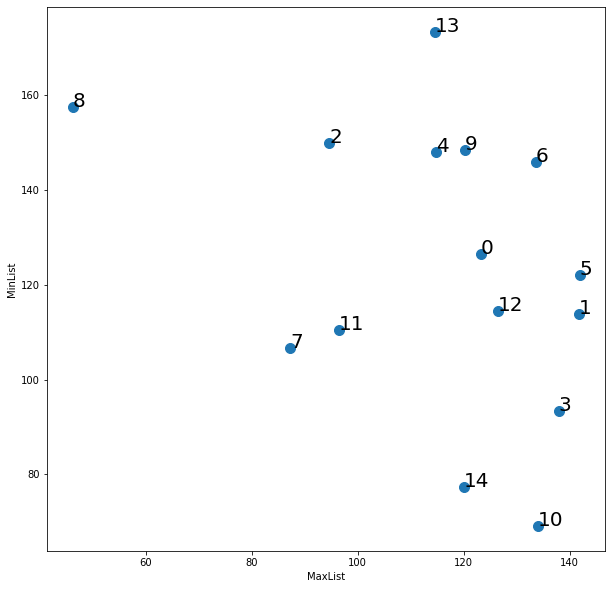

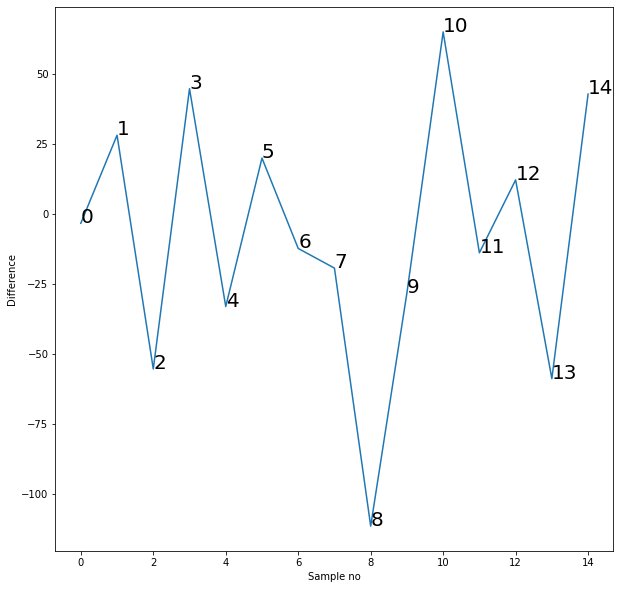

In [ ]:
#Objective function = Rmax - Rmin for 10 variables just here for experiment
#That is for comparison with the previous code


import matplotlib.pyplot as plt 
from numpy import random

def squrroot(x,y,z,k,l):
  return (x**2+y**2+z**2+k**2+l**2)**0.5


print(x)


front = x[0]
print("Square root")

maxList = []
minList = []
a,b,c,d,e = 1,1,1,1,1
# increasing the value of coeffiecen to maximize and decreasing to minimize

for i in range(len(x)):
  squr_root_max = squrroot(a*x[i][0],b*x[i][1],c*x[i][2],b*x[i][3],c*x[i][4])

  squr_root_min = squrroot(d*x[i][5],e*x[i][6],b*x[i][7],c*x[i][8],x[i][9])

  maxList.append(squr_root_max)
  minList.append(squr_root_min)

  print(str(i)+"  no row----->"+str(squr_root_max)+"---->"+str(squr_root_min))

index = 0
frontMax = maxList[0]
frontMin = minList[0]
for i in range(len(x)):
  
  if (maxList[i]- minList[i]) >= (frontMax - frontMin):
    frontMax = maxList[i]
    frontMin = minList[i]
    index = i

print('Approximate solution')
print(str(index)+" ..........is the soultion number")

plt.figure(figsize=(10,10))
plt.scatter(maxList, minList, s= 100)
for i in range(len(x)):
  plt.annotate(str(i), (maxList[i],minList[i]), size = 20)

plt.xlabel('MaxList')
plt.ylabel('MinList')


diffList = []
sampleNoList = [i for i in range(len(x))]
for i in range(len(x)):
  diffList.append(maxList[i] - minList[i])


plt.figure(figsize=(10,10))
plt.plot(sampleNoList, diffList)
for i in range(len(x)):
  plt.annotate(str(i), (sampleNoList[i],diffList[i]), size = 20)

plt.xlabel('Sample no')
plt.ylabel('Difference')


In [ ]:
class valueIndex:  
    def __init__(self, x, y):  
        self.x = x  
        self.y = y 

list = []  
  
# appending instances to list  
list.append( geeks(2, 3) ) 
list.append( geeks(12, 13) ) 
list.append( geeks(22, 33) ) 
  
for i in range(len(list)): 
    # calling method  
    print(list[i].x)
    print(list[i].y)

2
3
12
13
22
33
